### Jupyter Notebook 단축키
- ctrl+enter: 셀 실행
- shift+enter: 셀 실행 및 다음 셀 이동
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- esc: 셀 나가기
- m: 마크다운 셀로 바꾸기
- y: 마크다운 셀을 다시 Code로 바꾸기

# 07장_순환신경망

### 7.1 순환 신경망의 구조
* 출력 값이 다음 입력을 받을 때의 RNN 네트워크에도 동일하게 전달
* 입력과 출력의 길이에 제한이 없음

### 7.2 주요 레이어 정리

In [2]:
# SimpleRNN 레이어를 생성하는 코드

import tensorflow as tf

rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences = True)

In [3]:
# 앞쪽 4개의 숫자가 주어졌을 때 그 다음에 올 숫자를 예측하는 간단한 "시퀀스 예측 모델" 만들기
# 시퀀스 예측 데이터 생성

import numpy as np


X = []
Y = []
for i in range(6):
    # [0, 1, 2, 3], [1, 2, 3, 4] 같은 정수의 시퀀스를 만들기
    lst = list(range(i, i+4))
    
    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장
    # SimpleRNN에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장
    X.append(list(map(lambda c: [c/10], lst)))
    
    # 정답에 해당하는 4, 5 등의 정수 역시 앞에서처럼 10으로 나눠서 저장
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [4]:
# 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 네트워크 훈련 및 결과 확인

model.fit(X, Y, epochs=100, verbose=0) # verbose 몹션을 통해 출력 나오지 않게 설정 가능
print(model.predict(X))

[[0.38317966]
 [0.5083335 ]
 [0.61963606]
 [0.71585083]
 [0.79717815]
 [0.8647087 ]]


In [6]:
# 학습되지 ㅇ낳은 시퀀스에 대한 예측 결과

print(model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]])))
print(model.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]])))

[[0.9199383]]
[[0.24722119]]


In [7]:
# SimpleRNN 레이어는 입력 데이터가 길어질수록, 즉 데이터의 타임스텝이 커질수록 학습 능력이 떨어지는 문제가 존재
# 이를 해결하기 위해 LSTM 레이어 사용

# 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0 ~ 1 범위의 랜덤한 숫자 100개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    #마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장ㅎ바니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.27140951]
 [0.         0.87774051]
 [0.         0.22931339]
 [0.         0.21079003]
 [0.         0.85773838]
 [0.         0.30542988]
 [0.         0.38165361]
 [0.         0.74604963]
 [0.         0.16056048]
 [0.         0.66008196]
 [0.         0.46552435]
 [0.         0.92277373]
 [0.         0.35260187]
 [0.         0.33324927]
 [0.         0.56963377]
 [0.         0.95618467]
 [0.         0.83921481]
 [0.         0.19033361]
 [0.         0.67925662]
 [0.         0.30379556]
 [0.         0.6805382 ]
 [0.         0.54261461]
 [0.         0.5165187 ]
 [0.         0.84850067]
 [0.         0.1186904 ]
 [0.         0.00452285]
 [0.         0.76859805]
 [0.         0.06961205]
 [0.         0.53268643]
 [0.         0.20031684]
 [0.         0.13555111]
 [1.         0.98705913]
 [0.         0.88106854]
 [0.         0.89755654]
 [0.         0.87931753]
 [0.         0.59217937]
 [0.         0.66226849]
 [0.         0.56949874]
 [0.         0.41850031]
 [0.         0.15974062]


In [9]:
# SimpleRNN 레이어를 이용한 곱셈 문제 모델 정의

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [10]:
# SimpleRNN 네트워크 학습

X = np.array(X)
Y = np.array(Y)
#2560개의 데이터만 학습시킵니다. 검증 데이터는 20%로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 15ms/step - loss: 0.0661 - val_loss: 0.0509
Epoch 2/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0546 - val_loss: 0.0504
Epoch 3/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0548 - val_loss: 0.0507
Epoch 4/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0551 - val_loss: 0.0526
Epoch 5/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0533 - val_loss: 0.0501
Epoch 6/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0528 - val_loss: 0.0492
Epoch 7/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0528 - val_loss: 0.0510
Epoch 8/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0533 - val_loss: 0.0504
Epoch 9/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0538 - val_loss: 0.0526
Epoch 10/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0548 - val_loss: 0.0494

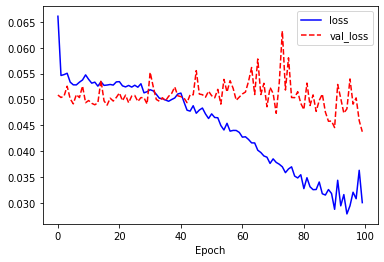

In [11]:
# SimpleRNN 네트워크 학습 결과 확인
# 과적합

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [12]:
# 테스트 데이터에 대한 예측 정확도 확인
# 논문에서는 오차가 0.04 이상일 때 오답으로 처리

model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1 
print('correctness:', (440-fail) / 440 * 100, '%')

14/14 [==============================] - 0s 4ms/step - loss: 0.0455
0.045873082416488235 	 0.21885745 	diff: 0.1729843698568806
0.5029060033208358 	 0.048603952 	diff: 0.45430205138983604
0.16057937106870665 	 0.14410658 	diff: 0.016472789261570114
0.15338785666583415 	 0.105970934 	diff: 0.047416922632440295
0.004047173275358534 	 0.22814037 	diff: 0.2240931957822968
correctness: 13.636363636363635 %


In [13]:
# LSTM 레이어를 이용한 곱셈 문제 모델 정의 

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [14]:
# LSTM 네트워크 학습

X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 3s 27ms/step - loss: 0.0565 - val_loss: 0.0486
Epoch 2/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0530 - val_loss: 0.0491
Epoch 3/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0528 - val_loss: 0.0487
Epoch 4/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0525 - val_loss: 0.0492
Epoch 5/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0528 - val_loss: 0.0486
Epoch 6/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0526 - val_loss: 0.0489
Epoch 7/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0524 - val_loss: 0.0487
Epoch 8/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0529 - val_loss: 0.0499
Epoch 9/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0529 - val_loss: 0.0485
Epoch 10/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0525 - val_loss: 0.0497

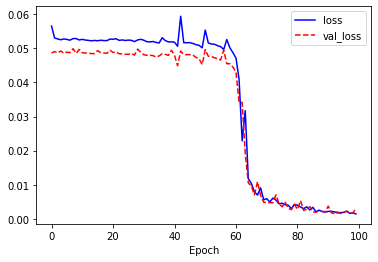

In [15]:
# LSTM 네트워크 학습 결과 확인

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
# 테스트 데이터에 대한 예측 정확도 확인
# 논문에서는 오차가 0.04 이상일 때 오답으로 처리

model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1 
print('correctness:', (440-fail) / 440 * 100, '%')

14/14 [==============================] - 0s 7ms/step - loss: 0.0032
0.045873082416488235 	 0.050693747 	diff: 0.004820664239691193
0.5029060033208358 	 0.5764672 	diff: 0.07356121269402627
0.16057937106870665 	 0.23814896 	diff: 0.07756958642221437
0.15338785666583415 	 0.1690368 	diff: 0.01564894896389607
0.004047173275358534 	 0.030259341 	diff: 0.026212167726152084
correctness: 52.95454545454545 %


### 7.2.3 GRU 레이어
* cell state가 없는 대신 $h_t$ 가 비슷한 역할을 함

In [17]:
# GRU 레이어를 이용한 곱셈 문제 모델 정의 

model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [18]:
# GRU 네트워크 학습

X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 3s 25ms/step - loss: 0.0643 - val_loss: 0.0489
Epoch 2/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0527 - val_loss: 0.0487
Epoch 3/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0527 - val_loss: 0.0490
Epoch 4/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0525 - val_loss: 0.0487
Epoch 5/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0526 - val_loss: 0.0486
Epoch 6/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0524 - val_loss: 0.0495
Epoch 7/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0525 - val_loss: 0.0487
Epoch 8/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0525 - val_loss: 0.0485
Epoch 9/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0525 - val_loss: 0.0485
Epoch 10/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0524 - val_loss: 0.0484

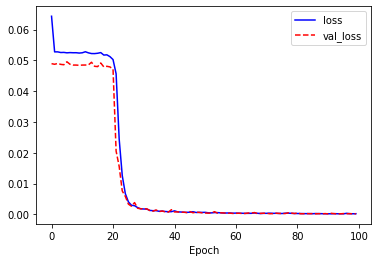

In [19]:
# GRU 네트워크 학습 결과 확인

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
# 테스트 데이터에 대한 예측 정확도 확인
# 논문에서는 오차가 0.04 이상일 때 오답으로 처리

model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1 
print('correctness:', (440-fail) / 440 * 100, '%')

14/14 [==============================] - 0s 6ms/step - loss: 1.9528e-04
0.045873082416488235 	 0.05666925 	diff: 0.010796167714165146
0.5029060033208358 	 0.48282894 	diff: 0.020077058399342262
0.16057937106870665 	 0.1644043 	diff: 0.0038249317667578275
0.15338785666583415 	 0.15233718 	diff: 0.0010506780779206415
0.004047173275358534 	 -0.002821887 	diff: 0.006869060187346792
correctness: 98.18181818181819 %


### 7.2.4 임베딩 레이어
* 단어나 문자 단위의 자연어 처리
* 대표적인 방법으로 Word2Vec, GloVe, FastText, ELMo 등이 존재 

### 7.3 긍정, 부정 감성 분석

In [21]:
# Naver Sentiment Movie Corpus v1.0 다운로드

path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4907008/4893335 [==============================] - 0s 0us/step


In [22]:
# 데이터 로드 및 확인

#데이터를 메모리에 불러옵니다. 인코딩 형식으로 utf-8을 지정해야 합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300자를 확인해봅니다.
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [23]:
# 학습을 위한 정답 데이터(Y) 만들기
# 긍정 1 / 부정 0

train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [27]:
# 훈련 데이터의 입력(X) 정제
# 입력으로 쓸 자연어를 토큰화(Tokenization)하고 정제(Cleaning) 

import re # 정규 표현식 라이브러리
# from CNN_sentence github 

def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


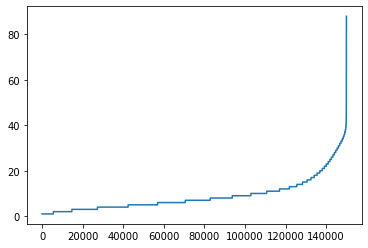

142587


In [30]:
# 각 문장의 단어 길이 확인
# 네트워크에 입력하기 위한 데이터의 크기(문장의 길이)는 동일해야 하는데 현재는 각 문장의 길이가 다르기 때문에 맞춰야함

import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

# y 축은 문장의 단어 개수, 대부분이 40단어 이하로 구성돼 있음을 확인할 수 있음

In [31]:
# 단어 정제 및 문장 길이 줄임

sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [32]:
# Tokenizer와 pad_sequences를 이용한 문장 전처리
# 짧은 문장을 같은 길이의 문장(25단어)으로 바꾸기 위한 패딩 작업

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')  # post는 문장 뒤에 패딩을 넣음 / pre는 문장 앞

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [33]:
# Tokenizer의 동작 확인

print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [34]:
# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 50s 53ms/step - loss: 0.4351 - accuracy: 0.7829 - val_loss: 0.3769 - val_accuracy: 0.8215
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.3227 - accuracy: 0.8480 - val_loss: 0.3824 - val_accuracy: 0.8207
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.2690 - accuracy: 0.8709 - val_loss: 0.4533 - val_accuracy: 0.8154
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.2258 - accuracy: 0.8901 - val_loss: 0.4931 - val_accuracy: 0.8099
Epoch 5/5
938/938 [==============================] - 49s 53ms/step - loss: 0.1930 - accuracy: 0.9048 - val_loss: 0.5601 - val_accuracy: 0.8017


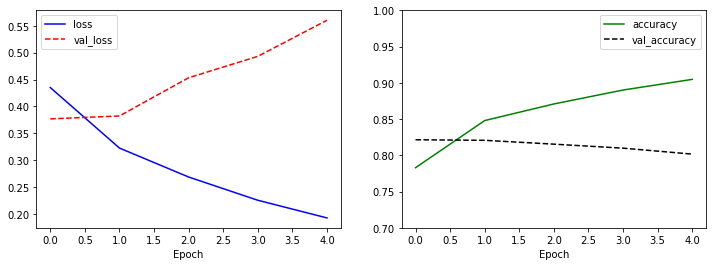

In [37]:
# 감성 분석 모델의 학습 결과 확인

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# 과적합 -> 임베딩 레이어를 랜덤한 값에서부터 시작해서 학습시키기 때문에 품질이 좋지 않아서!
# 이를 개선하기 위해 임베딩 레이러를 별도로 학습시켜 네트워크에 불러와 사용하거나 RNN이 아닌 CNN을 사용하는 방법이 존재

In [39]:
# 테스트 데이터 평가

test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.5663564801216125, 0.7970799803733826]

In [40]:
# 임의의 문장에 대한 감성 분석 결과 확인

test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.3200204 0.6799796]
['재미있을', '줄']
[0.32779956 0.6722004 ]
['재미있을', '줄', '알았는데']
[0.33166844 0.6683315 ]
['재미있을', '줄', '알았는데', '완전']
[0.3787941 0.6212059]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.3787941 0.6212059]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.36738923 0.63261074]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.99717474 0.00282521]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[9.9920815e-01 7.9191488e-04]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[9.9920815e-01 7.9191482e-04]


### 7.4 자연어 생성

### 7.4.1 단어 단위 생성

In [41]:
# 조선왕조실록 데이터 파일 다운로드

path_to_file = tf.keras.utils.get_file('input.txt', 'http://bit.ly/2Mc3SOV')

62021632/62012502 [==============================] - 2s 0us/step


In [42]:
# 데이터 로드 및 확인

# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print()

# 처음 100 자를 확인해봅니다.
print(train_text[:100])

# 한자가 많음, 한자와 한자가 들어간 괄호 생략

Length of text: 26265493 characters

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘


In [43]:
# 훈련 데이터 입력 정제

import re
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_X = []
for sentence in train_text:
    train_text_X.extend(sentence.split(' '))
    train_text_X.append('\n')
    
train_text_X = [word for word in train_text_X if word != '']

print(train_text_X[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [44]:
# 단어 토큰화
# Tokenizer를 쓰지 않고 직접 토큰화 (계산 시간 절감)

# 단어의 set을 만듭니다.
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique words'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
word2idx = {u:i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

text_as_int = np.array([word2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for word,_ in zip(word2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(word), word2idx[word]))
print('  ...\n}')

print('index of UNK: {}'.format(word2idx['UNK']))

332640 unique words
{
  '\n':   0,
  '!' :   1,
  ',' :   2,
  '000명으로':   3,
  '001':   4,
  '002':   5,
  '003':   6,
  '004':   7,
  '005':   8,
  '006':   9,
  ...
}
index of UNK: 332639


In [45]:
# 토큰 데이터 확인

print(train_text_X[:20])
print(text_as_int[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413]


In [46]:
# 기본 데이터셋 만들기
# tf.data.Dataset 이용 

seq_length = 25
examples_per_epoch = len(text_as_int) // seq_length
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
# 25개의 단어가 주어졌을 때 다음 단어를 예측하도록 데이터를 만듬

sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True) # 데이터셋 생성 코드
for item in sentence_dataset.take(1):
    print(idx2word[item.numpy()])
    print(item.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',' '휘']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2 330313]


In [47]:
# 7학습 데이터셋 만들기

def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2word[x.numpy()])
    print(x.numpy())
    print(idx2word[y.numpy()])
    print(y.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2]
휘
330313


In [48]:
# 데이터셋 shuffle, batch 설정

BATCH_SIZE = 512
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [49]:
# 단어 단위 생성 모델 정의

total_words = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2), # 과적합 방지
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 100)           33264000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 100)           80400     
_________________________________________________________________
dropout (Dropout)            (None, 25, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 332640)            33596640  
Total params: 67,021,440
Trainable params: 67,021,440
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 단어 단위 생성 모델 학습

from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    test_sentence = train_text[0]

    next_words = 100
    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])

        output_idx = model.predict_classess(test_text_X)
        test_sentence += ' ' + idx2word[output_idx[0]]
    
    print()
    print(test_sentence)
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
# 임의의 문장을 사용한 생성 결과 확인

from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'

next_words = 100
for _ in range(next_words):
    test_text_X = test_sentence.split(' ')[-seq_length:]
    test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
    
    output_idx = model.predict_classes(test_text_X)
    test_sentence += ' ' + idx2word[output_idx[0]]

print(test_sentence)

# 전체적인 문장의 의미가 잘 통하지는 않지만, 부분 부분에서는 자연스럽게 연결되는 단어들이 보이는 것을 확인 가능

### 7.4.2 자소 단위 생성
* 한글을 자소 단위로 분리하고 다시 합치는 라이브러리 사용 (신해빈님 jamotools)

In [ ]:
# jamotools 설치

!pip install jamotools

In [ ]:
# 자모 분리 테스트
# 영문이나 한자 등에는 영향을 주지 않음

import jamotools

train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
s = train_text[:100]
print(s)

# 한글 텍스트를 자모 단위로 분리해줍니다. 한자 등에는 영향이 없습니다.
s_split = jamotools.split_syllables(s)
print(s_split)

In [ ]:
# 자모 결합 테스트

s2 = jamotools.join_jamos(s_split)
print(s2)
print(s == s2)

In [ ]:
# 자모 토큰화
# 따로 텍스트 전처리를 하지 않기 때문에 괄호, 한자 등이 토큰에 포함됨

# 텍스트를 자모 단위로 나눕니다. 데이터가 크기 때문에 약간 시간이 걸립니다.
train_text_X = jamotools.split_syllables(train_text)
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique characters'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for char,_ in zip(char2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

print('index of UNK: {}'.format(char2idx['UNK']))

In [ ]:
# 토큰 데이터 확인

print(train_text_X[:20])
print(text_as_int[:20])

In [ ]:
# 학습 데이터세트 생성

seq_length = 80
examples_per_epoch = len(text_as_int) // seq_length
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

char_dataset = char_dataset.batch(seq_length+1, drop_remainder=True)
for item in char_dataset.take(1):
    print(idx2char[item.numpy()])
    print(item.numpy())
    
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = char_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2char[x.numpy()])
    print(x.numpy())
    print(idx2char[y.numpy()])
    print(y.numpy())
    
BATCH_SIZE = 256
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
# 자소 단위 생성 모델 정의

total_chars = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_chars, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=400),
    tf.keras.layers.Dense(total_chars, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# 자소 단위 생성 모델 학습

from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 99:
        return
    
    test_sentence = train_text[:48]
    test_sentence = jamotools.split_syllables(test_sentence)

    next_chars = 300
    for _ in range(next_chars):
        test_text_X = test_sentence[-seq_length:]
        test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += idx2char[output_idx[0]]
    
    print()
    print(jamotools.join_jamos(test_sentence))
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=100, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

In [ ]:
# 임의의 문장을 사용한 생성 결과 확인

from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'
test_sentence = jamotools.split_syllables(test_sentence)

next_chars = 300
for _ in range(next_chars):
    test_text_X = test_sentence[-seq_length:]
    test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])
    
    output_idx = model.predict_classes(test_text_X)
    test_sentence += idx2char[output_idx[0]]
    

print(jamotools.join_jamos(test_sentence))

# EOD